# Imports

In [702]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set Globals & Functions

In [703]:
def checkData(x):
    print(f"\nInfo dos valores:\n")
    print(x.info())
    print(f"\nDescrição dos dados:\n\n{x.describe()}")
    return

def checkNaN(x):
    # Recebe um DataFrame e retorna a quantidade de valores nulos e não nulos.
    null_count = x.isna().sum()
    non_null_count = x.notnull().sum()
    print(f"Null values:\n {null_count}")
    print(f"Non-null values:\n {non_null_count}")
    return

def checkOutliers(x):
    """Recebe um DataFrame e retorna um DataFrame com os outliers.
    Baseia-se no pressuposto de que os dados estão normalmente distribuídos."""
    dfOutliers  = pd.DataFrame()
    # Itera sobre as colunas númericas
    for column in x.select_dtypes(include=[np.number]).columns:
        # Calcula o 1 quartil (Q1)
        Q1 = x[column].quantile(0.25)
        # Calcula o 3 quartil (Q3)
        Q3 = x[column].quantile(0.75)
        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1
        # Define os limites inferior e superior para outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identica os outliers da coluna atual e adiciona ao DataFrame de outliers
        outliers = x[(x[column] < lower_bound) | (x[column] > upper_bound)]
        # Concatene os outliers da coluna atual ao DataFrame de outliers
        dfOutliers = pd.concat([dfOutliers, outliers])
    outliersData = dfOutliers.drop_duplicates().reset_index(drop=True)
    return outliersData

def corr(x):
    plt.figure(figsize=(10,8))
    sns.heatmap(x.select_dtypes(include=[np.number]).corr(), annot=True)
    plt.show()
    return

def hist(x):
    # Recebe um DataFrame e plota um histograma para cada coluna numérica.
    x.hist(bins=50, figsize=(25,10))
    plt.show()
    return




# Carregamento e Checagem

In [704]:
df_raw = pd.read_csv("train.csv")

In [705]:
checkData(df_raw)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4467 non-null   object 
 1   Delivery_person_ID           4467 non-null   object 
 2   Delivery_person_Age          4467 non-null   object 
 3   Delivery_person_Ratings      4467 non-null   object 
 4   Restaurant_latitude          4467 non-null   float64
 5   Restaurant_longitude         4467 non-null   float64
 6   Delivery_location_latitude   4467 non-null   float64
 7   Delivery_location_longitude  4467 non-null   float64
 8   Order_Date                   4467 non-null   object 
 9   Time_Orderd                  4467 non-null   object 
 10  Time_Order_picked            4467 non-null   object 
 11  Weatherconditions            4467 non-null   object 
 12  Road_traffic_density         4467 non-null   object 
 13

In [706]:
df_raw.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
3024,0x9e9c,VADRES05DEL01,36,4.4,22.310526,73.170937,22.420526,73.280937,29-03-2022,22:35:00,22:45:00,conditions Cloudy,Low,0,Meal,motorcycle,2,No,Metropolitian,(min) 41
3216,0xc895,KOCRES03DEL02,36,4.5,10.020683,76.310631,10.070683,76.360631,13-02-2022,22:10:00,22:15:00,conditions Stormy,Low,2,Meal,electric_scooter,0,No,Metropolitian,(min) 22
4109,0x8647,PUNERES07DEL03,21,4.8,18.546947,73.900626,18.576947,73.930626,11-03-2022,21:50:00,21:55:00,conditions Cloudy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,(min) 29
625,0xa077,PUNERES02DEL01,29,4.9,18.551440,73.804855,18.621440,73.874855,20-03-2022,19:40:00,19:55:00,conditions Fog,Jam,0,Meal,motorcycle,2,No,Metropolitian,(min) 45
3062,0x901a,MUMRES12DEL03,26,4.7,19.207222,72.972281,19.237222,73.002281,17-03-2022,17:55:00,18:10:00,conditions Fog,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 27
1011,0xb6d1,INDORES18DEL01,29,4.9,22.753839,75.897429,22.823839,75.967429,18-03-2022,19:45:00,19:50:00,conditions Fog,Jam,1,Drinks,scooter,1,No,Metropolitian,(min) 37
529,0xd747,AGRRES07DEL02,31,4.3,27.160934,78.044095,27.180934,78.064095,11-02-2022,09:30:00,09:45:00,conditions Windy,Low,0,Drinks,motorcycle,1,No,Metropolitian,(min) 25
512,0x8011,SURRES19DEL03,36,4.6,21.149669,72.772629,21.179669,72.802629,28-03-2022,19:00:00,19:10:00,conditions Fog,Medium,2,Drinks,scooter,1,No,Metropolitian,(min) 17
404,0x6e9d,CHENRES03DEL01,28,4,13.091809,80.219104,13.131809,80.259104,15-03-2022,13:30:00,13:45:00,conditions Stormy,High,0,Buffet,motorcycle,1,No,Metropolitian,(min) 32
2702,0x16c1,PUNERES04DEL02,NaN,NaN,18.514210,73.838429,18.534210,73.858429,15-03-2022,NaN,08:25:00,conditions Sunny,Low,2,Meal,scooter,1,No,Metropolitian,(min) 22


# Limpeza & Transansformação

Claramente algumas colunas possuem valores NaN, mas eles não estão aparecendo na checagem de NaNs. Isso pode ser porque eles são do tipo objeto ou estão armazenados como string e possuem algum formato estranho como " NaN", com um espaço em branco.<br>Os primeiros passos serão: remover excesso de NaNs e remover todos os espaços das colunas de string, depois convertê-las para o tipo apropriado e preenchê-las com o valor mais apropriado.

## Remover espaços & Corrigir tipos de dados e erros de escrita

In [707]:
df_clear = df_raw.copy()
# Remover espaços em branco no início e no final das strings
df_clear = df_clear.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Converter para tipos númericos onde for necessario
df_clear["Delivery_person_Age"] = df_clear["Delivery_person_Age"].apply(pd.to_numeric, errors="coerce").astype("Int64")
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].apply(pd.to_numeric, errors="coerce")
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].apply(pd.to_numeric, errors="coerce").astype("Int64")
# Corrigir erro de escrita em colunas
df_clear.rename(columns={"Time_Orderd": "Time_Ordered"}, inplace=True)
# Corrigir erro de escrita em valores
df_clear["City"] = df_clear["City"].str.replace("Metropolitian", "Metropolitan", regex=False)
# Converter para tipo date.time para melhor manipulá-los
df_clear["Order_Date"] = pd.to_datetime(df_clear["Order_Date"], format="%d-%m-%Y").astype("string")
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Time_Ordered"], format="%H:%M:%S").dt.time.astype("string")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear["Time_Order_picked"], format="%H:%M:%S").dt.time.astype("string")
# Remover letras da coluna "Time_taken(min)" e conberter tipo para "Int64"
df_clear["Time_taken(min)"] = df_clear["Time_taken(min)"].str.extract(r'(\d+)').astype("Int64")
# Remover excesso de palavras na coluna "Weatherconditions"
df_clear["Weatherconditions"] = df_clear["Weatherconditions"].str.replace("conditions ", "", regex=False)
# Mudar NaNs para "Unknown" em colunas que não guardam valores numéricos
df_clear["Weatherconditions"] = df_clear["Weatherconditions"].str.replace("NaN", "Unknown", regex=False)
df_clear["Road_traffic_density"] = df_clear["Road_traffic_density"].str.replace("NaN", "Unknown", regex=False)
df_clear["City"] = df_clear["City"].str.replace("NaN", "Unknown", regex=False)
df_clear["Festival"] = df_clear["Festival"].str.replace("NaN", "Unknown", regex=False)


In [708]:
print(f"Max rating: {df_clear["Delivery_person_Ratings"].max()}\nMin rating: {df_clear["Delivery_person_Ratings"].min()}")
df_clear[df_clear["Delivery_person_Ratings"] > 5.0]

Max rating: 6.0
Min rating: 1.0


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
3586,0x46d,BANGRES05DEL01,50,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,<NA>,12:30:00,Unknown,Unknown,3,Meal,electric_scooter,0,No,Urban,25


Há um valor de avaliação de 6,0. Como há apenas um valor "errado" e, assumindo que o máximo é 5 "estrelas", ele será corrigido para 5.

In [709]:
df_clear.loc[df_clear["Delivery_person_Ratings"] > 5.0, "Delivery_person_Ratings"] = 5.0

## Remover excesso de NaNs

In [710]:
# Para manter a análise simples, linhas com mais de 2 NaNs serão removidas, o que dá ~5% dos dados
df_clear = df_clear.dropna(thresh=len(df_clear.columns) - 2).reset_index(drop=True)
# Há somente 1 NaN em "Time_taken(min)", que será substituído removido pois o trabalho para estipula-lo não é viável
df_clear = df_clear.dropna(subset=["Time_taken(min)"]).reset_index(drop=True)

In [711]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           4291 non-null   object 
 1   Delivery_person_ID           4291 non-null   object 
 2   Delivery_person_Age          4277 non-null   Int64  
 3   Delivery_person_Ratings      4271 non-null   float64
 4   Restaurant_latitude          4291 non-null   float64
 5   Restaurant_longitude         4291 non-null   float64
 6   Delivery_location_latitude   4291 non-null   float64
 7   Delivery_location_longitude  4291 non-null   float64
 8   Order_Date                   4291 non-null   string 
 9   Time_Ordered                 4287 non-null   string 
 10  Time_Order_picked            4291 non-null   string 
 11  Weatherconditions            4291 non-null   object 
 12  Road_traffic_density         4291 non-null   object 
 13

## Unir coordenadas em uma tupla em nova coluna

Para melhor trabalhar com as coordenadas, elas serão armazenadas como uma tupla.


In [712]:
df_clear["Restaurant_location"] = list(zip(df_clear["Restaurant_latitude"], df_clear["Restaurant_longitude"]))
df_clear["Delivery_location"] = list(zip(df_clear["Delivery_location_latitude"], df_clear["Delivery_location_longitude"]))
df_clear.drop(columns=["Restaurant_latitude", "Restaurant_longitude", "Delivery_location_latitude", "Delivery_location_longitude"], inplace=True)

## Unir datas e horas

Para melhor trabalhar com o tempo, "Order_date" será unido com "Time_Ordered" e "Time_Order_picked". Pelo mesmo motivo, "Time_taken(min)" será transformado em um date.time baseado em "Time_Order_picked" + "Time_taken(min)".

In [713]:
# Une as colunas de data e hora para uma melhor manipulação
df_clear["Time_Ordered"] = pd.to_datetime(df_clear["Order_Date"] + " " + df_clear["Time_Ordered"], format="%Y-%m-%d %H:%M:%S")
df_clear["Time_Order_picked"] = pd.to_datetime(df_clear['Order_Date'] + " " + df_clear["Time_Order_picked"], format="%Y-%m-%d %H:%M:%S")
# Adiciona 1 dia para pedidos feitos antes da meia noite e entregues depois da meia
df_clear["Time_Order_picked"] = df_clear.apply(lambda row: row["Time_Order_picked"] + pd.Timedelta(days=1) if row["Time_Ordered"] > row["Time_Order_picked"] else row["Time_Order_picked"], axis=1)
# Calcula a hora da entrega baseado em Time_order_pick + time_taken
df_clear["Time_Order_delivered"] = df_clear["Time_Order_picked"] + pd.to_timedelta(df_clear["Time_taken(min)"], unit="m")
# Remove as colunas originais de data e tempo
df_clear.drop(["Order_Date", "Time_taken(min)"], axis=1, inplace=True)

## Preenchendo NaNs

In [714]:
print(f'Mediana de "Delivery_person_Age": {df_clear['Delivery_person_Age'].median()}')
print(f'Média de "Delivery_person_Age": {df_clear['Delivery_person_Age'].mean()}')

Mediana de "Delivery_person_Age": 29.0
Média de "Delivery_person_Age": 29.449614215571664


A coluna "Delivery_person_Age" possui o valor de ~29 tanto para a mediana quanto para a média, então vamos preencher os NaNs com a mediana, pois é um Int e a média é um float.<br>Uma abordagem melhor seria aplicar um método como "KNN", mas neste exercício vamos nos manter no simples.

In [715]:
df_clear["Delivery_person_Age"] = df_clear['Delivery_person_Age'].fillna(df_clear['Delivery_person_Age'].median())

"Delivery_person_Ratings" pode ser preenchido com a média baseada no "Delivery_person_ID".

In [716]:
df_aux = df_clear[["Delivery_person_ID", "Delivery_person_Ratings"]].dropna()
df_aux = df_aux.groupby(["Delivery_person_ID"]).mean().reset_index()
df_clear = df_clear.merge(df_aux, on="Delivery_person_ID", how="left", suffixes=('', '_mean'))
df_clear["Delivery_person_Ratings"] = df_clear["Delivery_person_Ratings"].fillna(df_clear["Delivery_person_Ratings_mean"])
df_clear.drop(columns=["Delivery_person_Ratings_mean"], inplace=True)

NaNs em "Time_ordered" podem ser preenchidos com base nos outros pedidos, agrupados pelo tipo de pedido.<br>A suposição aqui é que as refeições provavelmente têm um tempo de preparo mais longo do que o buffet, que tem um tempo mais longo do que as bebidas, que têm um tempo mais longo do que as lanches.

In [717]:
df_aux = df_clear[["Time_Ordered", "Time_Order_picked", "Time_Order_delivered", "Type_of_order"]].dropna()
df_aux["Time_to_pick"] = (df_aux["Time_Order_picked"] - df_aux["Time_Ordered"]).dt.total_seconds() / 60
df_aux["Time_to_delivery"] = (df_aux["Time_Order_delivered"] - df_aux["Time_Order_picked"]).dt.total_seconds() / 60
df_aux = df_aux.drop(columns=["Time_Ordered", "Time_Order_picked", "Time_Order_delivered"])
df_times_grouped = df_aux.groupby(["Type_of_order"]).agg(["mean", "median"]).reset_index()
df_times_grouped

Type_of_order Time_to_pick        Time_to_delivery       
                        mean median             mean median
0        Buffet     9.781784   10.0        26.122391   25.0
1        Drinks     9.841954   10.0        26.286398   25.5
2          Meal    10.032110   10.0        26.225688   25.0
3         Snack     9.977252   10.0        26.482257   26.0

A suposição não foi exatamente verdadeira, mas a mediana de "Time_to_pick" pode ser usada para calcular quando os pedidos com NaNs foram feitos sem muita distorção nos dados.

In [718]:
df_clear["Time_Ordered"] = df_clear["Time_Ordered"].fillna(df_clear["Time_Order_picked"] - pd.to_timedelta(df_times_grouped.loc[0, ("Time_to_pick", "median")], unit="m"))

Em "multiple_delivery", a suposição é: se não é uma entrega múltipla, essa entrada não foi preenchida, então os NaNs serão preenchidos com 1.

In [719]:
df_clear["multiple_deliveries"] = df_clear["multiple_deliveries"].fillna(1)

In [720]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4291 non-null   object        
 1   Delivery_person_ID       4291 non-null   object        
 2   Delivery_person_Age      4291 non-null   Int64         
 3   Delivery_person_Ratings  4291 non-null   float64       
 4   Time_Ordered             4291 non-null   datetime64[ns]
 5   Time_Order_picked        4291 non-null   datetime64[ns]
 6   Weatherconditions        4291 non-null   object        
 7   Road_traffic_density     4291 non-null   object        
 8   Vehicle_condition        4291 non-null   int64         
 9   Type_of_order            4291 non-null   object        
 10  Type_of_vehicle          4291 non-null   object        
 11  multiple_deliveries      4291 non-null   Int64         
 12  Festival      

# Engenharia de Features

In [721]:
df_work = df_clear.copy()

# Analysis

## Primeiras KBQs
Por enquanto, as perguntas de négocio serão respondidas sem o uso de técnicas intermediárias/avançadas como groupby, agg, plotting, machine learning, etc...

### 1. Qual o número total de entregas cadastradas na base de dados?
**Resposta:** O número total de entregas cadastrados na base de dados é 4291.

In [722]:
len(df_work)

4291

### 2. Quantos entregadores únicos existem na base de dados?
**Resposta:** Há 1131 IDs únicos na base de dados, porem aparentemente não são entregadores, mas sim empresas que oferecem o serviço de entrega, pois há multiplas idades para o mesmo ID de entregador.

Primeiramente foi notado nos datasets abaixo que há multiplas idades para o mesmo ID de entregador, o que sugere que provavelmente o ID não é do entregador, mas provavelmente da empresa que oferece o serviço de entrega.
Note que, apesar de não ser usado técnicas como groupby e agg, foi aberto uma exceção para o código abaixo, pois ele não visa responder a pergunta, mas sim apontar uma inconsistência na base de dados.

In [723]:
df_aux = df_work[["Delivery_person_ID", "Delivery_person_Age"]].dropna()
df_age_grouped = df_aux.groupby(["Delivery_person_ID"]).agg(["count"]).reset_index()
df_age_grouped

,Delivery_person_ID,Delivery_person_Age
,,count
0,AGRRES010DEL01,1
1,AGRRES010DEL02,2
2,AGRRES01DEL02,1
3,AGRRES01DEL03,1
4,AGRRES02DEL02,1
...,...,...
1126,VADRES19DEL02,7
1127,VADRES19DEL03,5
1128,VADRES20DEL01,5


In [724]:
df_clear.loc[df_clear['Delivery_person_ID'] == 'VADRES19DEL02', ["Delivery_person_ID", "Delivery_person_Age"]]

,Delivery_person_ID,Delivery_person_Age
921,VADRES19DEL02,38
2160,VADRES19DEL02,33
2972,VADRES19DEL02,34
3091,VADRES19DEL02,28
3326,VADRES19DEL02,36
3390,VADRES19DEL02,28
4205,VADRES19DEL02,38


Portanto será tratado como "ID único" e não "entregador único".

In [725]:
# Get the size of the unique values in the column Delivery_person_ID
len(df_work["Delivery_person_ID"].unique())

1131

### 3. Qual a idade do entregador mais velho? E do mais novo?
**Resposta:** A maior idadeade é 50 anos e a menor idade é 15 anos.

In [726]:
df_work["Delivery_person_Age"].sort_values(ascending=True)

2292    15
2787    15
2833    15
1944    20
3031    20
        ..
65      39
2976    39
3029    39
4277    39
3448    50
Name: Delivery_person_Age, Length: 4291, dtype: Int64

### 4. Qual o ID do entregador com a maior idade? E o ID do entregaor com a menor idade?
**Resposta:** O ID do entregador mais velho é "BANGRES05DEL01" e o ID do entregador mais novo é "JAPRES15DEL03".

In [727]:
max_age_row = df_work.loc[df_work["Delivery_person_Age"].idxmax()]
min_age_row = df_work.loc[df_work["Delivery_person_Age"].idxmin()]
age_max_min = {
    "max": {
        "Delivery_person_ID": str(max_age_row["Delivery_person_ID"]),
        "Delivery_person_Age": int(max_age_row["Delivery_person_Age"])
    },
    "min": {
        "Delivery_person_ID": str(min_age_row["Delivery_person_ID"]),
        "Delivery_person_Age": int(min_age_row["Delivery_person_Age"])
    }
}
age_max_min


{'max': {'Delivery_person_ID': 'BANGRES05DEL01', 'Delivery_person_Age': 50},
 'min': {'Delivery_person_ID': 'JAPRES15DEL03', 'Delivery_person_Age': 15}}

### 5. Quais os nomes das condições climáticas?
**Resposta:** As condições climáticas são: 
- "Sunny"
- "Stormy"
- "Sandstorms"
- "Cloudy"
- "Fog"
- "Windy"
- "Unknown".

Lembrando que "Unknown" foi criado para conter os valores nulos da coluna.

In [728]:
df_work["Weatherconditions"].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy',
       'Unknown'], dtype=object)

### 6. Quantas entregas foram realizadas sob condições climáticas de tempestade de areia (Sandstorms)?
**Resposta:** Foram feitas 697 entregas com a condição "Sandstorms".

In [729]:
len(df_work.loc[df_work["Weatherconditions"] == "Sandstorms", "Weatherconditions"])

697

### 7. Quais eram as condicões climáticas da data mais recente de entrega?
**Resposta:** A condição climática da data mais recente de entrega foi "Fog" (Neblina).

In [730]:
df_work.loc[df_work["Time_Order_delivered"] == df_work["Time_Order_delivered"].max(), "Weatherconditions"]

1288    Fog
Name: Weatherconditions, dtype: object

### 8. Quantos tipos de densidade de trânsito existem na base de dados? Quais os nomes delas?
**Resposta:** Existem 5 tipos de densidade de trânsito na base de dados:
- High
- Jam
- Low
- Medium
- Unknown

Lembrando que "Unknown" foi criado para conter os valores nulos da coluna.

In [731]:
print(f"{len(df_work["Road_traffic_density"].unique())} tipos de densidade.\n{df_work["Road_traffic_density"].unique()}.")

5 tipos de densidade.
['High' 'Jam' 'Low' 'Medium' 'Unknown'].


### 9. Quantas entregas foram feitas em cada condição climática?
**Resposta:** A quantidade de entregas feitas em cada condição climática é: 
1. **Fog: 758**
2. **Windy: 725**
3. **Cloudy: 707**
4. **Stormy: 704**
5. **Sandstorms: 697**
6. **Sunny: 696**
7. **Unknown: 4**

In [732]:
for condition in df_work["Weatherconditions"].unique():
    print(f"{condition}: {len(df_work.loc[df_work["Weatherconditions"] == condition, "Weatherconditions"])}")

Sunny: 696
Stormy: 704
Sandstorms: 697
Cloudy: 707
Fog: 758
Windy: 725
Unknown: 4


### 10. Quantos entregadores únicos fizeram entregas em cada condição climática?
**Resposta:** A quantidade de entregadores únicos que fizeram entregas em cada condição climática é: 
1. **Sunny: 529**
2. **Windy: 523**
3. **Cloudy: 520**
4. **Fog: 511**
5. **Stormy: 504**
6. **Sandstorms: 504**
7. **Unknown: 4**

In [733]:
for condition in df_work["Weatherconditions"].unique():
    print(f"{condition}: {df_work.loc[df_work["Weatherconditions"] == condition, "Delivery_person_ID"].nunique()}")

Sunny: 529
Stormy: 504
Sandstorms: 504
Cloudy: 520
Fog: 511
Windy: 523
Unknown: 4


### 11. Quantas entregas foram feitas em cada tipo de densidade de trânsito?
**Resposta:** A quantidade de entregas feitas em cada condição de transito é: 
1. **Low: 1504**
2. **Jam: 1303**
3. **Medium: 1059**
4. **High: 421**
5. **Unknown: 4**

In [734]:
for condition in df_work["Road_traffic_density"].unique():
    print(f"{condition}: {len(df_work.loc[df_work["Road_traffic_density"] == condition, "Road_traffic_density"])}")

High: 421
Jam: 1303
Low: 1504
Medium: 1059
Unknown: 4


### 12. Quantos entregadores únicos fizeram entregas em cada tipo de densidade de trânsito?
**Resposta:** A quantidade de entregadores únicos que fizeram entregas em cada densidade de trânsito é: 
1. **Low: 784**
2. **Jam: 740**
3. **Medium: 649**
4. **High: 293**
5. **Unknown: 4**

In [735]:
for condition in df_work["Road_traffic_density"].unique():
    print(f"{condition}: {df_work.loc[df_work["Road_traffic_density"] == condition, "Delivery_person_ID"].nunique()}")

High: 293
Jam: 740
Low: 784
Medium: 649
Unknown: 4


### 13. Quantos tipos de cidades únicas existem na base? Quais são os seus nomes?
***Resposta:*** Há 4 tipos de cidades únicas na base e seus nomes são: 
- Urban
- Metropolitian
- Semi-Urban
- Unknown

In [736]:
print(f"Há {len(df_work["City"].unique())} tipos de cidades únicas na base e seus nomes são: {df_work["City"].unique()}.")

Há 4 tipos de cidades únicas na base e seus nomes são: ['Urban' 'Metropolitan' 'Semi-Urban' 'Unknown'].


### 14. Quantos tipos de veículos únicos existem na base? Quais são seus nomes?
***Resposta:*** Há 4 tipos de veículos únicos na base e seus nomes são:
- Bicycle
- scooter
- motorcycle
- electric_scooter

In [737]:
print(f"Há {len(df_work["Type_of_vehicle"].unique())} tipos de veículos únicos na base e seus nomes são: {df_work["Type_of_vehicle"].unique()}.")

Há 4 tipos de veículos únicos na base e seus nomes são: ['motorcycle' 'scooter' 'electric_scooter' 'bicycle'].


### 15. Qual o tipo de veículo que mais vez entregas com a condição de trânsito pesado (High)?
***Resposta:*** O tipo de veículo que mais fez entregas com a condição de trânsito pesado foi motorcycle, com 250 entregas.

In [738]:
df_work.loc[df_work["Road_traffic_density"] == "High", "Type_of_vehicle"].value_counts()

Type_of_vehicle
motorcycle          250
scooter             140
electric_scooter     31
Name: count, dtype: int64

### 16. Qual o tipo de pedido mais feito durante condições climáticas de tempestade de areia?
***Resposta:*** O tipo de pedido mas feito durante a condição climáticas de tempestade de areia foi meal, com 193 entregas.

In [739]:
df_work.loc[df_work["Weatherconditions"] == "Sandstorms", "Type_of_order"].value_counts()

Type_of_order
Meal      193
Snack     182
Buffet    161
Drinks    161
Name: count, dtype: int64

### 17. Qual o tipo de cidade com o maior número de pedidos de Bebidas (Drinks) feito em Scooter?
***Resposta:*** O tipo de cidade com o maior número de pedidos de bebidas feito em scooter foi Metropolitan, com 260 pedidos.

In [740]:
df_work.loc[(df_work["Type_of_order"] == "Drinks") & (df_work["Type_of_vehicle"] == "scooter"), "City"].value_counts()

City
Metropolitan    260
Urban            75
Unknown          15
Name: count, dtype: int64

### 18. Qual o tipo de cidade com o (os) entregador mais velho? E o nome da cidade com o (os) entregadores mais novos?
***Resposta:*** O tipo de cidade com o entregador mais velho é Urban e o tipo de cidade com 2 dos 3 entregadores mais novos é Metropolitan.

In [741]:
df_work.loc[df_work["Delivery_person_Age"] == df_work["Delivery_person_Age"].max(), "City"]

3448    Urban
Name: City, dtype: object

Há um unico entregador mais velho, que está no tipo de cidade Urban.

In [742]:
df_work.loc[df_work["Delivery_person_Age"] == df_work["Delivery_person_Age"].min(), "City"]

2292           Urban
2787    Metropolitan
2833    Metropolitan
Name: City, dtype: object

Há 3 entregadores mais novos, onde 2 estão no tipo de cidade Metropolitan.

### 19. Quantas entregas foram feitas durante o Festival?
***Resposta:*** Foram feitas 91 entregas durante o Festival.

In [743]:
len(df_work.loc[df_work["Festival"] == "Yes", "ID"])

91

### 20. Quantos tipos de cidades únicas tiveram entregas feitas durante o Festival?
***Resposta:*** Houve 4 tipos de cidades únicas que tiveram entregas feitas durante o Festival.

In [744]:
df_work.loc[df_work["Festival"] == "Yes", "City"].nunique()

4

### 21. Quantas entregas foram feitas durante o Festival no tipo de cidade Urban?
***Resposta:*** Foram feitas 18 entregas durante o Festival no tipo de cidade Urban.

In [745]:
df_work.loc[(df_work["Festival"] == "Yes") & (df_work["City"] == "Urban"), "ID"].count()

np.int64(18)

## Próximas KBQs
Agora as próximas perguntas de negócio serão respondidas usando o método SAP e o uso de tecnicas intermediarias como groupby e agg.

1. Qual o número total de entregadores cadastrados na base de dados?
 2. Qual o número total de entregadores únicos cadastrados na base de dados?
 2. Qual a média de idade dos entregadores por cidade?
 3. Qual a mediana de idade dos entregadores por cidade?
 4. Qual o número total de entregas feitas por densidade de tráfego?
 5. Qual a média das avaliações das entregas feitas por densidade de tráfego?
 6. Qual a quantidade de entregas feitas por cidade?
 Aula 34: As novas perguntas de negócio
 1
 Conteúdo licenciado para Lucas de Paula Teixeira - 129.522.527-18
7. Qual a média, mediana e desvio padrão das entregas feitas por cidade e por 
tipo de veículo?
 8. Qual a primeira data de entrega por cada cidade?
 9. Qual a última data de entrega por cada cidade?
 10. Qual a média de avaliações das entregas feitas por condições climáticas?
 11. Qual o valor da avaliação mais baixa feita por tipo de condição climática e 
por densidade de tráfego?
 12. Qual a média, mediana e desvio padrão das avaliações por cada tipo de 
condições de veículos?
 13. Quantas entreagas foram feitas no Festival?
 14. Qual a avaliação média das entregas feitas no Festival?
 15. Qual a menor avaliação feita em uma entrega no Festival e por cidade?
 16. Qual a maior avaliação feita por tipo de pedido?
 17. Qual a idade do entregador mais velho da planilha de dados?
 18. Qual a idade do entregador mais novo da planilha de dados?
 19. Quantas entregas foram feitas em cada condição climática?
 20. Quantas entregas foram feitas em cada tipo de densidade de trânsito?

As perguntas de negócio

 
 
 
 

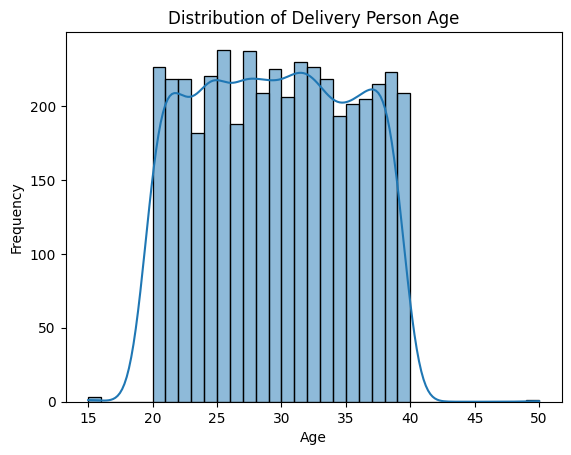

In [746]:
sns.histplot(df_clear["Delivery_person_Age"], kde=True, bins=range(int(df_clear["Delivery_person_Age"].min()), int(df_clear["Delivery_person_Age"].max()) + 1))
plt.title("Distribution of Delivery Person Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [747]:
checkData(df_clear)


Info dos valores:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       4291 non-null   object        
 1   Delivery_person_ID       4291 non-null   object        
 2   Delivery_person_Age      4291 non-null   Int64         
 3   Delivery_person_Ratings  4291 non-null   float64       
 4   Time_Ordered             4291 non-null   datetime64[ns]
 5   Time_Order_picked        4291 non-null   datetime64[ns]
 6   Weatherconditions        4291 non-null   object        
 7   Road_traffic_density     4291 non-null   object        
 8   Vehicle_condition        4291 non-null   int64         
 9   Type_of_order            4291 non-null   object        
 10  Type_of_vehicle          4291 non-null   object        
 11  multiple_deliveries      4291 non-null   Int64         
 12  Festival      

In [748]:
df_clear.sample(30)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Time_Ordered,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Restaurant_location,Delivery_location,Time_Order_delivered
2866,0x31e7,RANCHIRES19DEL01,27,4.90,2022-03-01 08:40:00,2022-03-01 08:50:00,Windy,Low,2,Drinks,scooter,1,No,Urban,"(23.333017, 85.3172)","(23.343017, 85.3272)",2022-03-01 09:05:00
1261,0xdcb6,GOARES16DEL03,21,5.00,2022-02-16 21:50:00,2022-02-16 22:05:00,Windy,Jam,2,Meal,scooter,1,No,Metropolitan,"(15.498603, 73.826911)","(15.588603, 73.916911)",2022-02-16 22:23:00
314,0x490e,RANCHIRES12DEL02,36,4.70,2022-03-13 11:50:00,2022-03-13 12:00:00,Sandstorms,High,2,Meal,scooter,2,No,Metropolitan,"(0.0, 0.0)","(0.02, 0.02)",2022-03-13 12:32:00
301,0x8f58,VADRES11DEL01,30,4.60,2022-03-13 10:40:00,2022-03-13 10:55:00,Cloudy,Low,0,Buffet,motorcycle,0,No,Urban,"(22.308096, 73.167753)","(22.318096, 73.177753)",2022-03-13 11:19:00
1163,0x6a01,PUNERES07DEL03,36,4.10,2022-04-05 22:50:00,2022-04-05 22:55:00,Windy,Low,0,Buffet,motorcycle,0,No,Metropolitan,"(18.546947, 73.900626)","(18.606947, 73.960626)",2022-04-05 23:19:00
1671,0x1acb,COIMBRES14DEL03,39,4.80,2022-03-14 23:00:00,2022-03-14 23:10:00,Fog,Low,0,Snack,motorcycle,3,No,Metropolitan,"(11.003681, 76.975525)","(11.093681, 77.065525)",2022-03-14 23:54:00
3106,0x4eb6,MUMRES14DEL02,31,4.40,2022-03-13 09:25:00,2022-03-13 09:30:00,Windy,Low,0,Drinks,motorcycle,1,No,Metropolitan,"(19.1813, 72.836191)","(19.2013, 72.856191)",2022-03-13 09:59:00
577,0x8227,JAPRES16DEL01,22,4.30,2022-03-18 19:50:00,2022-03-18 20:00:00,Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitan,"(26.849596, 75.800512)","(26.919596, 75.870512)",2022-03-18 20:36:00
585,0x1c01,MUMRES19DEL03,31,5.00,2022-03-19 22:55:00,2022-03-19 23:00:00,Fog,Low,0,Meal,motorcycle,1,No,Metropolitan,"(19.131141, 72.813074)","(19.19114, 72.873074)",2022-03-19 23:28:00
890,0x4700,COIMBRES19DEL01,35,4.90,2022-03-27 19:35:00,2022-03-27 19:40:00,Fog,Jam,0,Snack,motorcycle,1,No,Metropolitan,"(11.022298, 76.998349)","(11.092298, 77.068349)",2022-03-27 20:28:00
